In [1]:
!pip install easyocr
!pip install imutils

In [5]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np
import imutils 
import easyocr

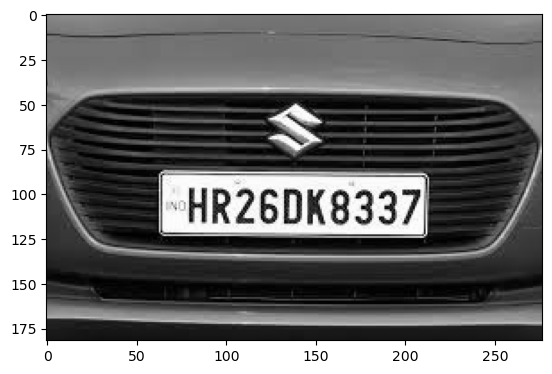

In [67]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('car5.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray,cv2.COLOR_BGR2RGB))

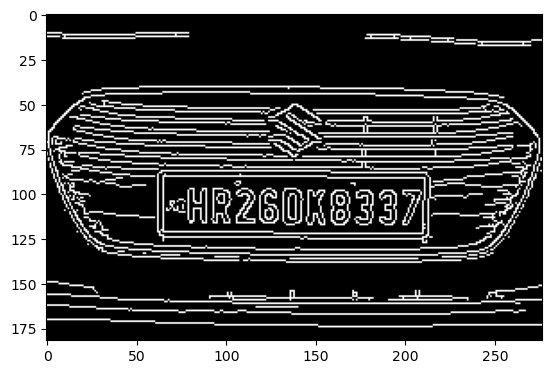

In [68]:
bfilter = cv2.bilateralFilter(gray,17,17,17)
edged = cv2.Canny(bfilter,30,200)
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

In [70]:
import imutils 
keypoints = cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours,key = cv2.contourArea,reverse=True)[:10]

In [71]:
location = None
for countour in contours:
    approx =  cv2.approxPolyDP(countour,10,True)
    if(len(approx) == 4):
        location = approx
        break

In [72]:
location

array([[[ 65,  91]],

       [[210,  91]],

       [[210, 121]],

       [[ 66, 121]]], dtype=int32)

In [73]:
import numpy as np
mask = np.zeros(gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[location],0,255,-1)
new_image = cv2.bitwise_and(img,img,mask = mask)

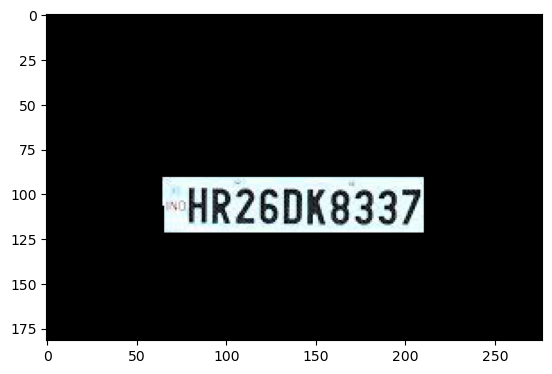

In [74]:
plt.imshow(new_image)

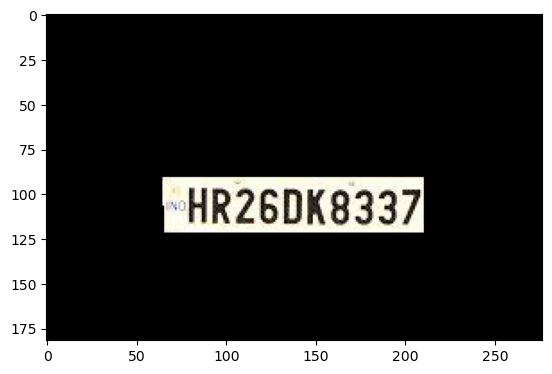

In [75]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))
final_image = cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB)
plt.savefig('final_image.jpg')

In [76]:
from PIL import Image
from pytesseract import pytesseract

#Define path to tessaract.exe
path_to_tesseract = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

#Define path to image
path_to_image = 'final_image.jpg'

#Point tessaract_cmd to tessaract.exe
pytesseract.tesseract_cmd = path_to_tesseract

#Open image with PIL
img = Image.open(path_to_image)

#Extract text from image
text = pytesseract.image_to_string(img)

print(text)

HR26DK8337




In [14]:
!pip install pytesseract
